In [2]:
# imports
import pickle
import pulp
from pulp import *
import re
import pandas as pd
import numpy as np
import itertools
import pickle
import matplotlib.pyplot as plt

In [3]:
# read in the data
DATE = '2019-12-01'

file = open("consolidated_many_days.pkl",'rb')
file2 = open("consolidated_many_days2.pkl",'rb')
data = pickle.load(file)
data2 = pickle.load(file2)
data.update(data2)


example_contest = data[DATE]['CONTESTS'][0]['PAYOUTS']
example_results = data[DATE]['ACTUAL_POINTS']
example_projections = data[DATE]['PROJECTIONS']

COST = data[DATE]['CONTESTS'][0]['Buy In']
example_results

#example_results

,Player,Pos,Avg,Fpts,"NBA $25K Four Point Play [20 Entry Max, 2x Min Cash]",NBA $150K Excellent 8's [$50K to 1st],NBA $15.1K Spin Move [$3K to 1st],NBA $40K SLAM Jam [$10K to 1st],NBA $20K Hall of Famer [$10K to 1st],NBA Single Entry $25 Double Up
0,Rudy Gay,SF/PF/F/UTIL,68.95%,20.75,59.67% (-9.28),53.77% (-15.19),73.39% (4.44),67.50% (-1.45),90.00% (21.05),69.40% (0.44)
1,DeMar DeRozan,SG/SF/F/G/UTIL,66.69%,30.50,60.46% (-6.23),51.28% (-15.41),63.05% (-3.64),64.50% (-2.19),80.00% (13.31),80.85% (14.16)
2,Fred VanVleet,PG/SG/G/UTIL,52.90%,49.75,45.46% (-7.44),42.97% (-9.93),54.52% (1.62),58.00% (5.10),60.00% (7.10),56.47% (3.57)
3,Pascal Siakam,PF/C/F/UTIL,49.65%,53.25,43.48% (-6.17),38.39% (-11.26),40.83% (-8.82),43.00% (-6.65),70.00% (20.35),62.19% (12.54)
4,Jakob Poeltl,C/UTIL,42.61%,23.75,32.36% (-10.25),30.64% (-11.97),43.41% (0.80),46.00% (3.39),60.00% (17.39),43.28% (0.67)
...,...,...,...,...,...,...,...,...,...,...
127,Louis King,SF/PF/F/UTIL,0.00%,NaN,0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00)
128,Chimezie Metu,PF/C/F/UTIL,0.00%,NaN,0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00)
129,Quinndary Weatherspoon,PG/G/UTIL,0.00%,NaN,0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00)
130,Keldon Johnson,SG/SF/F/G/UTIL,0.00%,NaN,0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00),0.00% (0.00)


In [4]:
data.keys()

dict_keys(['2019-10-22', '2019-10-23', '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-11', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-

In [5]:
# process the data
#trasform the columns so the names agree with each other
def process_name(name):
    filtered = re.sub(r'([^\s\w]|_)+', '', name)
    #dumb edge cases
    if filtered == 'Moe Harkless':
        filtered = 'Maurice Harkless'
    if filtered == 'Wes Iwundu':
        filtered = 'Wesley Iwundu'
    if filtered == 'Juan Hernangomez':
        filtered = 'Juancho Hernangomez'
    return filtered.split()[0]+ " " + filtered.split()[1]
def get_Fpts(df, player):
    df = df[df['Player'] == player]
    #print(df)
    #print(player)
    try:
        return 0 if np.isnan(df.iloc[0].Fpts) else df.iloc[0].Fpts
    except:
        #print("???")
        return 0
example_projections = dict((process_name(key), value) for (key, value) in example_projections.items())
example_results.Player = example_results.Player.apply(lambda x: process_name(x))

In [6]:
players = set()
for date in data:
    players.update(set(data[date]['ACTUAL_POINTS'].Player))
for player in players:
    player = process_name(player)

In [7]:
players

{'Aaron Gordon',
 'Aaron Holiday',
 'Abdel Nader',
 'Abdul Gaddy',
 'Adam Mokoka',
 'Admiral Schofield',
 'Al Horford',
 'Al-Farouq Aminu',
 'AlFarouq Aminu',
 'Alec Burks',
 'Alen Smailagic',
 'Alex Caruso',
 'Alex Len',
 'Alfonzo McKinnie',
 'Alize Johnson',
 'Allen Crabbe',
 'Allonzo Trier',
 'Amile Jefferson',
 'Amir Coffey',
 'Andre Drummond',
 'Andre Iguodala',
 'Andre Roberson',
 'Andrew Wiggins',
 'Anfernee Simons',
 'Ante Zizic',
 'Anthony Davis',
 'Anthony Tolliver',
 'Antonius Cleveland',
 'Anzejs Pasecniks',
 'Aron Baynes',
 'Austin Rivers',
 'Avery Bradley',
 'B.J. Johnson',
 'Bam Adebayo',
 'Barry Brown Jr.',
 'Ben McLemore',
 'Ben Simmons',
 'Bismack Biyombo',
 'Blake Griffin',
 'Boban Marjanovic',
 'Bobby Portis',
 'Bogdan Bogdanovic',
 'Bojan Bogdanovic',
 'Bol Bol',
 'Brad Wanamaker',
 'Bradley Beal',
 'Brandon Clarke',
 'Brandon Goodwin',
 'Brandon Ingram',
 'Brandon Knight',
 'Brian Bowen II',
 'Brook Lopez',
 'Bruce Brown',
 'Bruno Caboclo',
 'Bruno Fernando',
 'Br

In [8]:
name = 'JaMychal Green'
residuals = []
for date in data:
    if name in data[date]['PROJECTIONS'] and name in set(data[date]['ACTUAL_POINTS'].Player):
        residuals.append(get_Fpts(data[date]['ACTUAL_POINTS'],name)-data[date]['PROJECTIONS'][name]['points'])

(array([2., 1., 4., 4., 2., 5., 3., 0., 1., 2.]),
 array([-18.04 , -13.946,  -9.852,  -5.758,  -1.664,   2.43 ,   6.524,
         10.618,  14.712,  18.806,  22.9  ]),
 <a list of 10 Patch objects>)

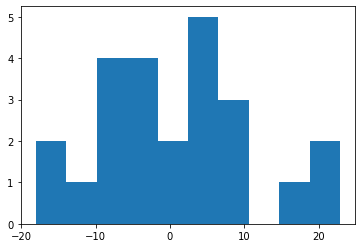

In [9]:
plt.hist(residuals)

In [10]:
sum(residuals)/len(residuals)

0.6529166666666665

In [11]:
np.std(residuals)

10.466146409243578

In [12]:
10*(8**.5)

28.284271247461902

In [13]:

for name in players:
    residuals = []
    acts = []
    for date in data:
        if name in data[date]['PROJECTIONS'] and name in set(data[date]['ACTUAL_POINTS'].Player):
            acts.append(get_Fpts(data[date]['ACTUAL_POINTS'],name))
            residuals.append(get_Fpts(data[date]['ACTUAL_POINTS'],name)-data[date]['PROJECTIONS'][name]['points'])
    if len(residuals) != 0:
        print(np.std(residuals),np.mean(acts) )

0.0 0.5
8.530429991497718 20.140625
8.734156856846571 22.42142857142857
9.149463377818439 7.910714285714286
9.833413484708435 12.691176470588236
6.961219874623782 10.142857142857142
8.202605851191437 6.3375
9.475910906986556 36.24074074074074
9.114820020164961 9.55
0.4299999999999997 16.25
8.809981447985834 24.85185185185185
8.451163093852164 8.520833333333334
7.229341103386646 8.261904761904763
10.382491325237234 18.14516129032258
8.40913966849928 15.96551724137931
7.776407089538344 14.7
5.906095495333613 6.625
8.055517443983508 29.693548387096776
9.834714649896963 21.678571428571427
10.444574043544938 19.39516129032258
9.8453507184473 10.663461538461538
12.307999082978995 28.88888888888889
6.368698724033035 10.71875
9.668168082634583 22.953703703703702
8.056585246878505 14.871212121212121
6.527744992529962 8.2109375
11.112539355033114 30.08653846153846
10.466146409243578 19.260416666666668
9.981207217599541 38.45454545454545
8.759766060803223 8.14
5.731868039498312 11.275
8.742911598

6.242104831486951 15.143939393939394
2.771257611626895 4.25
8.82781898672841 25.62121212121212
2.6317900277187767 2.5625
11.10185344886159 20.135416666666668
12.205277379820885 40.142857142857146
0.0 13.75
10.274589091540351 26.6125
6.867323342386674 10.566666666666666
8.744093134573406 22.1484375
7.552195226182583 30.875
7.44032232983774 11.869047619047619
0.0 0.0
8.42150259566419 25.765151515151516
7.142991320168323 11.59375
5.874679527902399 7.316666666666666
8.596195174865157 13.75
8.6746209444224 17.580882352941178
8.98726906938052 21.0
9.625238185162344 20.198529411764707
7.390002136291604 21.198529411764707
7.753203798159989 12.4375
8.843139754072597 11.403846153846153
7.8135299210401445 9.911764705882353
7.3322555099835185 13.040322580645162
7.698182256779438 43.3984375
9.029804185936904 8.318181818181818
3.8250000000000006 0.0
10.205518674652705 34.4264705882353
3.5582111610564464 6.25
0.0 4.0
5.125628560873713 6.342105263157895
9.36218902557924 33.12096774193548
10.2425953008

In [50]:
13.5*(8**.5)

38.18376618407357

In [1]:
from scipy import stats
name1 = "LeBron James"
name2 = "Anthony Davis"
#name1 = "J.J. Redick"
#name2 = "LeBron James"
for name2 in players:
    X = []
    Y = []
    #print(name1)
    for date in data:
        #print(date)
        projs = data[date]['PROJECTIONS']
        trues = set(data[date]['ACTUAL_POINTS'].Player)
        if name1 in projs and name2 in projs and name1 in trues and name2 in trues:
            #print("hello")
            X.append(get_Fpts(data[date]['ACTUAL_POINTS'],name1)-data[date]['PROJECTIONS'][name1]['points'])
            Y.append(get_Fpts(data[date]['ACTUAL_POINTS'],name2)-data[date]['PROJECTIONS'][name2]['points'])
    if len(X) > 20:
        slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)
        print(name2, np.corrcoef(X,Y)[0][1], p_value)


#X



NameError: name 'players' is not defined

In [177]:
for name2 in ["Jordan Clarkson"]:
    X = []
    Y = []
    #print(name1)
    for date in data:
        #print(date)
        projs = data[date]['PROJECTIONS']
        trues = set(data[date]['ACTUAL_POINTS'].Player)
        if name1 in projs and name2 in projs and name1 in trues and name2 in trues:
            #print("hello")
            X.append(get_Fpts(data[date]['ACTUAL_POINTS'],name1)-data[date]['PROJECTIONS'][name1]['points'])
            Y.append(get_Fpts(data[date]['ACTUAL_POINTS'],name2)-data[date]['PROJECTIONS'][name2]['points'])
    if len(X) > 10:
        print(name2, np.corrcoef(X,Y)[0][1])

Jordan Clarkson 0.634213179601096


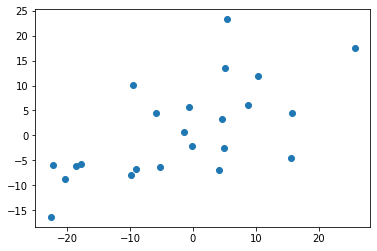

In [178]:
plt.scatter(X,Y)

In [104]:
X

[]

In [100]:
Y

[-11.46,
 11.880000000000003,
 -9.68,
 4.829999999999998,
 -7.75,
 -57.78,
 -4.829999999999998,
 4.130000000000003,
 2.3900000000000006,
 6.289999999999999,
 6.75,
 -22.89,
 4.399999999999999,
 5.189999999999998,
 10.43]

In [77]:
example_projections

{'Tyus Jones': {'ceil': 47.41,
  'floor': 11.96,
  'points': 29.52,
  'salary': 3100.0},
 'Isaac Bonga': {'ceil': 27.86,
  'floor': 3.05,
  'points': 14.05,
  'salary': 1500.0},
 'Jalen Brunson': {'ceil': 23.05,
  'floor': 2.82,
  'points': 11.53,
  'salary': 1500.0},
 'Brandon Clarke': {'ceil': 65.14,
  'floor': 10.46,
  'points': 35.23,
  'salary': 4800.0},
 'Dillon Brooks': {'ceil': 54.47,
  'floor': 13.03,
  'points': 29.54,
  'salary': 4500.0},
 'Kevin Knox': {'ceil': 38.74,
  'floor': 6.22,
  'points': 21.46,
  'salary': 3300.0},
 'Jaren Jackson': {'ceil': 62.32,
  'floor': 13.3,
  'points': 35.47,
  'salary': 5600.0},
 'Solomon Hill': {'ceil': 37.58,
  'floor': 4.81,
  'points': 18.8,
  'salary': 3000.0},
 'DeAndre Jordan': {'ceil': 49.03,
  'floor': 10.01,
  'points': 29.27,
  'salary': 4700.0},
 'Jae Crowder': {'ceil': 50.59,
  'floor': 10.64,
  'points': 30.94,
  'salary': 5100.0},
 'Damyean Dotson': {'ceil': 37.56,
  'floor': 8.61,
  'points': 18.79,
  'salary': 3200.0},
 'T

In [21]:
from scipy.linalg import cholesky

# Correlation matrix
corr_mat= np.array([[1, .25, .25, 0, 0, 0, 0, 0,],
                    [.25, 1, .25, 0, 0, 0, 0, 0,],
                    [.25, .25, 1, 0, 0, 0, 0, 0,],
                    [0, 0, 0, 1, .25, .25,0, 0,],
                    [0, 0, 0, .25, 1, .25,0, 0,],
                    [0, 0, 0, .25, .25, 1,0, 0,],
                    [0, 0, 0, 0, 0, 0,1, .25,],
                    [0, 0, 0, 0, 0, 0,.25, 1,],])
"""
corr_mat= np.array([[1, -.4, -.4,],
                    [-.4, 1, -.4],
                    [-.4, -.4, 1],])
"""
# Compute the (upper) Cholesky decomposition matrix
upper_chol = cholesky(corr_mat)

# Generate 3 series of normally distributed (Gaussian) numbers
rnd = np.random.normal(30, 13, size=(10**7, 8))

# Finally, compute the inner product of upper_chol and rnd
ans = rnd @ upper_chol

In [22]:
ans

array([[32.01201065, 15.97122684, 39.97413179, ..., 51.98938763,
        34.96789497, 43.86339696],
       [21.39023194, 50.62775002, 53.26273836, ..., 74.9936924 ,
        26.15890498, 27.42534718],
       [11.44089492, 17.07951883, 21.74753865, ..., 33.71019989,
        56.29353554, 36.83141624],
       ...,
       [24.71287582, 42.80195637, 54.25133385, ..., 51.59612606,
        40.92882296, 44.42613232],
       [37.5946891 , 51.94174193, 38.60764693, ..., 37.66272766,
        30.97486322, 27.0688874 ],
       [26.2286789 , 33.57630312, 61.17231324, ..., 42.65869753,
        26.99368562, 28.07337241]])

In [23]:
len(ans)

10000000

In [24]:
np.std(ans.T[0])

13.00038574227799

In [25]:
np.std(np.sum(ans, axis=1))

44.0849677618824

In [26]:
10*8**.5

28.284271247461902

In [27]:
upper_chol

array([[1.        , 0.25      , 0.25      , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.96824584, 0.19364917, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.9486833 , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.25      ,
        0.25      , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.96824584,
        0.19364917, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.9486833 , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.25      ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.96824584]])

In [28]:
13*8**.5

36.76955262170048

In [1]:
data.key()

NameError: name 'data' is not defined